In [28]:
#Lectura de datos  
import pandas as pd

#Leer datos desde una hoja de excel y seleccionando la hoja
df = pd.read_excel('C:/Users/Daniel/Documents/Universidad Nacional/Series de Tiempo/TRM mensual.xlsx', sheet_name ='Hoja1')

In [29]:
#Cambiar el formato a fecha del indice
df.index = pd.to_datetime(df.Mes)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

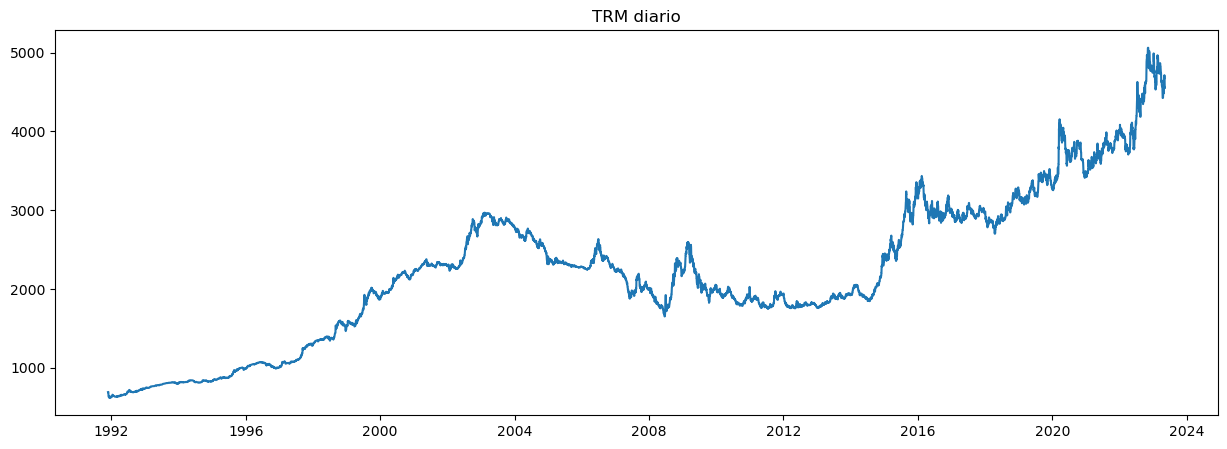

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df.TRM, label='Serie TRM')
plt.title("TRM diario")
plt.show()

In [45]:
# load the dataset
dataframe = df.TRM
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# train the model on the whole dataset
look_back = 1  # Number of previous time steps to consider
trainX, trainY = create_dataset(dataset, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)



Epoch 1/100
11470/11470 - 50s - loss: 0.0016 - 50s/epoch - 4ms/step
Epoch 2/100
11470/11470 - 45s - loss: 8.9037e-05 - 45s/epoch - 4ms/step
Epoch 3/100
11470/11470 - 44s - loss: 6.7162e-05 - 44s/epoch - 4ms/step
Epoch 4/100
11470/11470 - 43s - loss: 5.7446e-05 - 43s/epoch - 4ms/step
Epoch 5/100
11470/11470 - 42s - loss: 5.3046e-05 - 42s/epoch - 4ms/step
Epoch 6/100
11470/11470 - 43s - loss: 4.8517e-05 - 43s/epoch - 4ms/step
Epoch 7/100
11470/11470 - 43s - loss: 4.5909e-05 - 43s/epoch - 4ms/step
Epoch 8/100
11470/11470 - 41s - loss: 4.6798e-05 - 41s/epoch - 4ms/step
Epoch 9/100
11470/11470 - 45s - loss: 4.2734e-05 - 45s/epoch - 4ms/step
Epoch 10/100
11470/11470 - 44s - loss: 4.1945e-05 - 44s/epoch - 4ms/step
Epoch 11/100
11470/11470 - 45s - loss: 4.0686e-05 - 45s/epoch - 4ms/step
Epoch 12/100
11470/11470 - 44s - loss: 3.8046e-05 - 44s/epoch - 4ms/step
Epoch 13/100
11470/11470 - 45s - loss: 3.7241e-05 - 45s/epoch - 4ms/step
Epoch 14/100
11470/11470 - 45s - loss: 3.7746e-05 - 45s/epoch - 

In [46]:
# Predict the next 8 values
last_sequence = dataset[-look_back:].reshape((1, 1, look_back))
predictions = []
for _ in range(30):
    predicted_value = model.predict(last_sequence)
    predictions.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=2)
    last_sequence[0, 0, -1] = predicted_value

# Inverse transform the predictions
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 0s 145ms/step


In [34]:
df.TRM[-100:]

Mes
2023-01-29    4548.50
2023-01-30    4548.50
2023-01-31    4632.20
2023-02-01    4648.70
2023-02-02    4639.04
               ...   
2023-05-04    4667.09
2023-05-05    4616.58
2023-05-06    4552.56
2023-05-07    4552.56
2023-05-08    4552.56
Name: TRM, Length: 100, dtype: float64

In [47]:
predictions_plot = pd.DataFrame(predictions, index=pd.date_range(start='2023-05-09', periods=30, freq='d'))

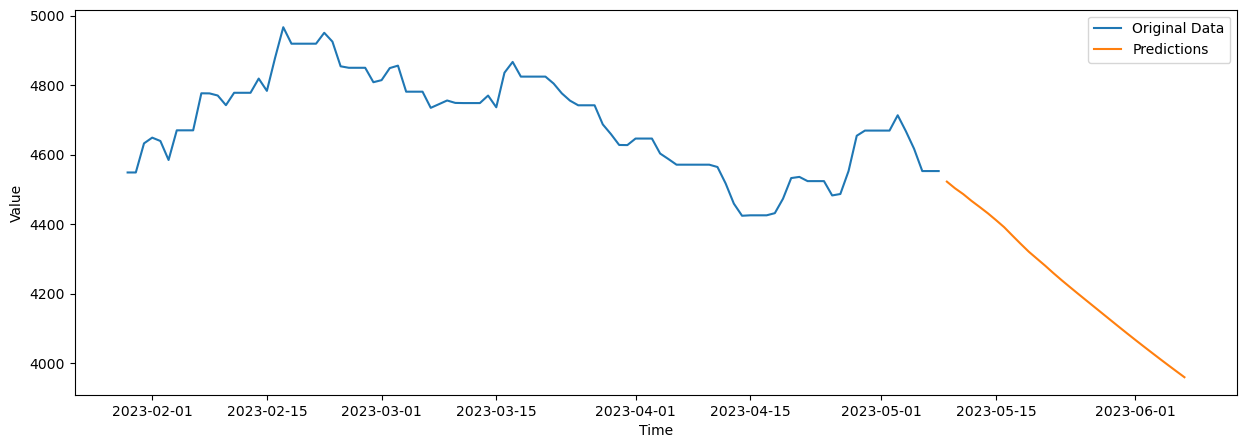

In [48]:
# Plot the original dataset and the predicted values
plt.figure(figsize=(15,5))
plt.plot(df.TRM[-100:], label='Original Data')  # Mostrar los últimos 100 valores
plt.plot(predictions_plot, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()